In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

### Open Relevant Sheets

In [2]:
filename = "Quantitative Task - Data Analysis - Auction.xlsx"
xl = pd.ExcelFile(filename)
names = xl.sheet_names
print names

[u'Definitions', u'Cost', u'Value Info', u'Demographic Info']


In [3]:
df1, df2 = xl.parse(names[2]), xl.parse(names[3])
df1 = df1.set_index('Customer ID')
df2 = df2.set_index('Customer ID')

### Look at Value Info Sheet
Note that first itme has no subsequent orders yet there is subsequent order profit.  

In [4]:
df1[:5]

,Source of Customer,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions
Customer ID,,,,,
1,Organic Search,8.97261,5.30772,0,6.600000
2,Affiliates,7.92288,70.15680,7,6.639453
3,Paid Social,14.06160,50.80320,7,0.000000
4,Affiliates,14.07672,0.00000,0,0.000000
5,Paid Search,22.68000,68.22144,9,14.771948


### Are their many entries with  no subsequent orders yet have subsequent order profit?
No just one

In [5]:
no_subsequent_orders = df1['Subsequent Orders Count'] == 0
subsequent_orders_profit = df1['Subsequent Order Profit'] > 0
df1[no_subsequent_orders & subsequent_orders_profit]

,Source of Customer,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions
Customer ID,,,,,
1,Organic Search,8.97261,5.30772,0,6.6


### Add Total Profit and Mean Profit

In [6]:
df1['Profit'] = df1['1st Order Profit'] + df1['Subsequent Order Profit']
df1['Mean Profit'] = df1['Profit'] / (df1['Subsequent Orders Count'] + 1)
df1.head()

,Source of Customer,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Profit,Mean Profit
Customer ID,,,,,,,
1,Organic Search,8.97261,5.30772,0,6.600000,14.28033,14.280330
2,Affiliates,7.92288,70.15680,7,6.639453,78.07968,9.759960
3,Paid Social,14.06160,50.80320,7,0.000000,64.86480,8.108100
4,Affiliates,14.07672,0.00000,0,0.000000,14.07672,14.076720
5,Paid Search,22.68000,68.22144,9,14.771948,90.90144,9.090144


In [7]:
cost = xl.parse('Cost')
print cost
paid_search, affiliates = [41512, 61243, 84598], [16421,42101,141321]

  Unnamed: 0   Unnamed: 1  Unnamed: 2
0        NaT  Paid Search  Affiliates
1 2013-01-01        41512       16421
2 2013-02-01        61243       42101
3 2013-03-01      84597.9      141321


### Look at some value counts to get a sense of the data

In [8]:
print df1['Source of Customer'].value_counts(), "\n"

print df1['Subsequent Orders Count'].value_counts(), "\n"

Direct            10941
Organic Search     8164
Paid Search        6354
Affiliates         3756
Paid Social        1376
Name: Source of Customer, dtype: int64 

0     10742
6      2492
4      2336
7      1952
1      1899
3      1839
2      1747
5      1490
10     1239
9      1132
8       934
12      891
13      535
14      399
11      375
16      260
17      141
19       87
20       44
22       24
18       12
23        6
24        6
15        6
26        2
32        1
Name: Subsequent Orders Count, dtype: int64 



### Plot Subsequent Orders Counts

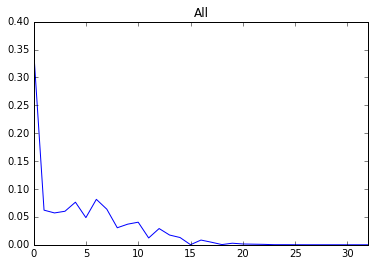

In [9]:
value_counts = df1['Subsequent Orders Count'].value_counts()

sorted_counts = value_counts.sort_index()
total = sum(value_counts)
adjusted_all = sorted_counts/total
adjusted_all.plot(title = "All")

### Plot Subsequent Orders by Different Sources
No discernible difference by any subgroup. Let's look at the the Demographic Information Sheet to see if we can do more.

<function __main__.plot_source>

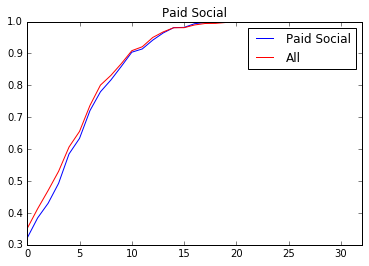

In [10]:
from ipywidgets import interact

def create_soc_interact(df = None, column = None, measure = 'Subsequent Orders Count'):
  
    source = {str(x):x for x in df[column].unique()}
    
    def plot_source(subgroup):
        filtered_subgroup = df[df[column] == subgroup]
        vc = filtered_subgroup[measure].value_counts() # No of elements in filtered column
        sorted_subgroup = vc.sort_index()
        total = sum(vc)
        adjusted_subgroup = sorted_subgroup/total
        adjusted_subgroup.cumsum().plot( title = subgroup)
        adjusted_all.cumsum().plot(color='r')
        plt.legend(labels= [subgroup, 'All'])
        
    return interact(plot_source, subgroup=source)
   
create_soc_interact(df=df1, column='Source of Customer')

In [11]:
days_until_end_of_march = 91 # leap year
df2['Days'] = df2['Registration Date'].map(lambda date: days_until_end_of_march - date.dayofyear)
df2.tail()

,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Days
Customer ID,,,,,,,
31437,Mr,1964-12-19,Dublin,N,2013-03-15 17:28:00,Affiliates,17
31438,Mr,1977-09-23,Mullingar,Y,2013-03-15 17:28:00,Paid Search,17
31439,Mr,1988-07-02,Dublin,Y,2013-03-15 17:28:00,Paid Social,17
31440,Miss,1993-02-10,Dublin,Y,2013-03-15 17:29:00,Direct,17
31441,Mr,1971-12-18,Letterkenny,Y,2013-03-15 17:30:00,Direct,17


### Plot Locations Outside Dublin
Dublin excluded to make it easier to see other locations. Nothing strange here seems to go with population size.

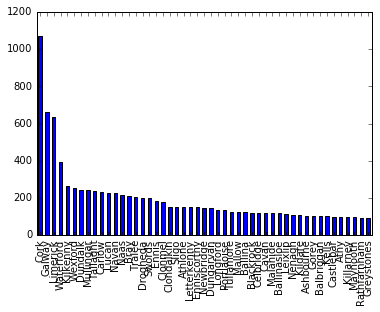

In [12]:
df2[df2['Address City'] != 'Dublin']['Address City'].value_counts().plot(kind='bar')

In [13]:
merged = df1.join(df2, lsuffix='_x')
merged[-5:]

,Source of Customer_x,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Profit,Mean Profit,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Days
Customer ID,,,,,,,,,,,,,,
31437,Affiliates,11.08800,97.396992,9,27.623670,108.484992,10.848499,Mr,1964-12-19,Dublin,N,2013-03-15 17:28:00,Affiliates,17
31438,Paid Search,20.73600,69.672960,10,8.870218,90.408960,8.218996,Mr,1977-09-23,Mullingar,Y,2013-03-15 17:28:00,Paid Search,17
31439,Paid Social,6.89472,41.803776,4,0.000000,48.698496,9.739699,Mr,1988-07-02,Dublin,Y,2013-03-15 17:28:00,Paid Social,17
31440,Direct,8.98800,0.000000,0,2.519968,8.988000,8.988000,Miss,1993-02-10,Dublin,Y,2013-03-15 17:29:00,Direct,17
31441,Direct,2.59200,69.050880,6,9.196737,71.642880,10.234697,Mr,1971-12-18,Letterkenny,Y,2013-03-15 17:30:00,Direct,17


### Check for Subsequent Orders by Tiltle
'Mr' and 'N/A' have more subsequent orders whereas 'Ms' and 'Mrs' have fewer. This makes sense as we are looking at men's

<function __main__.plot_source>

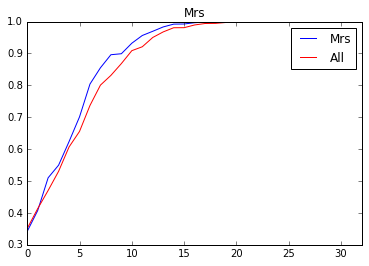

In [14]:
merged['Title'] = merged['Title'].fillna('N/A')
create_soc_interact(df=merged, column='Title')

### Get Profit and Order Count per day registered

In [15]:
merged['Profit/day'] = merged['Subsequent Order Profit']/merged['Days']
merged['Orders/day'] = merged['Subsequent Orders Count']/merged['Days']
merged.head()

,Source of Customer_x,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Profit,Mean Profit,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Days,Profit/day,Orders/day
Customer ID,,,,,,,,,,,,,,,,
1,Organic Search,8.97261,5.30772,0,6.600000,14.28033,14.280330,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,90,0.058975,0.000000
2,Affiliates,7.92288,70.15680,7,6.639453,78.07968,9.759960,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,90,0.779520,0.077778
3,Paid Social,14.06160,50.80320,7,0.000000,64.86480,8.108100,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,90,0.564480,0.077778
4,Affiliates,14.07672,0.00000,0,0.000000,14.07672,14.076720,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,90,0.000000,0.000000
5,Paid Search,22.68000,68.22144,9,14.771948,90.90144,9.090144,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,90,0.758016,0.100000


### Add Age Groups

In [16]:
bins = [0, 30,65,100]
labels = ['Young','Medium', 'Old']
age = merged['Date Of Birth'].map(lambda date: 2016 -date.year)
merged['Age Group'] = pd.cut(age, bins, labels =labels)
merged.head()

,Source of Customer_x,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Profit,Mean Profit,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Days,Profit/day,Orders/day,Age Group
Customer ID,,,,,,,,,,,,,,,,,
1,Organic Search,8.97261,5.30772,0,6.600000,14.28033,14.280330,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,90,0.058975,0.000000,Medium
2,Affiliates,7.92288,70.15680,7,6.639453,78.07968,9.759960,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,90,0.779520,0.077778,Medium
3,Paid Social,14.06160,50.80320,7,0.000000,64.86480,8.108100,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,90,0.564480,0.077778,Young
4,Affiliates,14.07672,0.00000,0,0.000000,14.07672,14.076720,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,90,0.000000,0.000000,Young
5,Paid Search,22.68000,68.22144,9,14.771948,90.90144,9.090144,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,90,0.758016,0.100000,Young


### Build a Pivot Table on Source and Title

The greatest profit is coming from men in all groups. The best group is paid social.  

In [17]:
values = ['1st Order Profit', 'Mean Profit', 'Profit']
index = ["Source of Customer","Title"]
functions=[np.mean]

pd.pivot_table(merged,index=index, values=values, aggfunc=functions)

mean                       
                         1st Order Profit Mean Profit     Profit
Source of Customer Title                                        
Affiliates         Miss          6.748814    6.273073  27.756671
                   Mr            8.296119    7.710530  40.383175
                   Mrs           7.746512    6.665787  30.612158
                   Ms            6.796294    6.463288  28.165541
                   N/A           6.807271    6.330137  26.821207
Direct             Miss          9.301990    8.803565  40.511934
                   Mr           11.682846   10.753400  54.933210
                   Mrs           9.913678    9.136020  40.856228
                   Ms            9.197405    8.936711  39.481405
                   N/A           9.573079    9.088760  39.828946
Organic Search     Miss          9.429256    9.003157  38.260585
                   Mr           11.793862   10.755755  54.660203
                   Mrs          10.382610    9.618631  45.043642
                   Ms            9.253289    8.759644  39.285139
                   N/A           9.717434    9.170289  40.117939
Paid Search        Miss          9.371504    8.806239  34.910413
                   Mr           11.803246   10.910698  54.586601
                   Mrs          10.161795    9.582932  40.186414
                   Ms            9.597515    9.076787  38.020902
                   N/A           8.999155    8.999826  37.806340
Paid Social        Miss         11.974647   11.214327  49.988106
                   Mr           14.443332   12.922611  67.399307
                   Mrs          13.571789   11.574995  51.233894
                   Ms           12.125256   10.852447  41.882157
                   N/A          11.430444   11.169382  55.017948

### Pivot Table Of Per Day Rates
**Offer Idea:** Paid search is doing very poorly on subsequent orders. This makes sense as people who come that route are probably shopping for a specific occasion. However we could offer them something off their next purchase.

In [18]:
values = [ '1st Order Profit', 'Profit/day', 'Orders/day']
index = ["Source of Customer","Title"]
functions=[np.median]
source = merged[merged['Subsequent Order Profit'] > 0]

pd.pivot_table(source,index=index, values=values, aggfunc=functions)

median                      
                         1st Order Profit Orders/day Profit/day
Source of Customer Title                                       
Affiliates         Miss           6.11415   0.143892   0.746139
                   Mr             7.54110   0.219345   1.401275
                   Mrs            7.54110   0.187500   1.048600
                   Ms             6.40920   0.150000   0.876960
                   N/A            6.48900   0.117647   0.592200
Direct             Miss           8.28300   0.122449   0.906933
                   Mr            10.76160   0.192539   1.710720
                   Mrs            8.88500   0.127932   1.020541
                   Ms             8.26000   0.104478   0.843797
                   N/A            9.00000   0.107692   0.863392
Organic Search     Miss           8.47500   0.131514   1.092891
                   Mr            10.84800   0.217391   1.899399
                   Mrs           10.06200   0.161364   1.337557
                   Ms             8.42400   0.111111   0.884618
                   N/A            8.82000   0.117647   1.005854
Paid Search        Miss           9.15600   0.097561   0.709739
                   Mr            10.84200   0.166667   1.534279
                   Mrs            9.57600   0.113055   0.899529
                   Ms             8.64000   0.106061   0.817297
                   N/A            8.00000   0.100000   0.809302
Paid Social        Miss          10.10880   0.200000   1.542857
                   Mr            12.88224   0.250000   2.482969
                   Mrs           14.14800   0.228758   2.118996
                   Ms            10.65600   0.222222   1.550147
                   N/A           10.33200   0.184211   1.915200

### Pivot Table Of Age Groups

** Offer Idea **: Old People spend more but are less likely to be recurring customers. Send young people exploding offers near payday and offer old people something off their next purchase.

In [19]:
values = [ '1st Order Profit', 'Profit/day', 'Orders/day']
index = ["Source of Customer", "Age Group"]
functions=[np.median]
source = merged[merged['Subsequent Order Profit'] > 0]

pd.pivot_table(source,index=index, values=values, aggfunc=functions)

median                      
                             1st Order Profit Orders/day Profit/day
Source of Customer Age Group                                       
Affiliates         Young              5.97898   0.194444   0.978432
                   Medium             7.80696   0.200000   1.273213
                   Old                8.40000   0.178571   1.130769
Direct             Young              8.46720   0.166667   1.241194
                   Medium            10.47800   0.148542   1.301208
                   Old               11.76000   0.173913   1.650000
Organic Search     Young              8.82000   0.198592   1.489986
                   Medium            10.80000   0.175439   1.620000
                   Old               13.20000   0.173163   1.756145
Paid Search        Young              8.83260   0.151845   1.075872
                   Medium            10.27200   0.135364   1.227734
                   Old               11.88000   0.130435   1.377463
Paid Social        Young             10.70496   0.294118   2.527352
                   Medium            13.25952   0.213526   2.167287
                   Old               19.44000   0.190849   1.636005

In [20]:
merged['Month'] = merged['Registration Date'].map(lambda date: ["Jan", "Feb", "Mar"][date.month-1])

In [21]:
merged.groupby('Month').aggregate(np.mean)

,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Profit,Mean Profit,Days,Profit/day,Orders/day
Month,,,,,,,,,
Feb,10.548317,37.045818,3.972219,6.436534,47.594135,9.942813,46.011310,0.853583,0.091362
Jan,9.183168,32.592142,3.546866,5.935570,41.775310,9.195421,73.900632,0.446103,0.048540
Mar,11.534935,40.173205,4.366273,6.785555,51.708141,10.230150,17.401394,3.019371,0.331136


In [22]:
merged['Profit'] = merged['Subsequent Order Profit'] + merged ['1st Order Profit']
merged.head()

,Source of Customer_x,1st Order Profit,Subsequent Order Profit,Subsequent Orders Count,Total value of all promotions,Profit,Mean Profit,Title,Date Of Birth,Address City,Contact Allowed,Registration Date,Source of Customer,Days,Profit/day,Orders/day,Age Group,Month
Customer ID,,,,,,,,,,,,,,,,,,
1,Organic Search,8.97261,5.30772,0,6.600000,14.28033,14.280330,Mr,1973-06-29,Malahide,Y,2013-01-01 00:23:00,Organic Search,90,0.058975,0.000000,Medium,Jan
2,Affiliates,7.92288,70.15680,7,6.639453,78.07968,9.759960,Mr,1984-07-25,Dublin,Y,2013-01-01 00:30:00,Affiliates,90,0.779520,0.077778,Medium,Jan
3,Paid Social,14.06160,50.80320,7,0.000000,64.86480,8.108100,Mr,1991-05-01,Dublin,Y,2013-01-01 01:09:00,Paid Social,90,0.564480,0.077778,Young,Jan
4,Affiliates,14.07672,0.00000,0,0.000000,14.07672,14.076720,Mr,1986-11-30,Dublin,N,2013-01-01 01:19:00,Affiliates,90,0.000000,0.000000,Young,Jan
5,Paid Search,22.68000,68.22144,9,14.771948,90.90144,9.090144,Mr,1991-10-02,Limerick,Y,2013-01-01 01:58:00,Paid Search,90,0.758016,0.100000,Young,Jan


In [23]:
from pandas.stats.api import ols

res = ols(y=merged['Profit'], x=merged['Total value of all promotions'])
res

C:\Anaconda4\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         30591
Number of Degrees of Freedom:   2

R-squared:         0.2382
Adj R-squared:     0.2382

Rmse:             42.3238

F-stat (1, 30589):  9567.2020, p-value:     0.0000

Degrees of Freedom: model 1, resid 30589

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     2.1635     0.0221      97.81     0.0000     2.1201     2.2068
     intercept    34.1028     0.2812     121.26     0.0000    33.5516    34.6540
---------------------------------End of Summary---------------------------------

In [24]:
print res.beta

x             2.163457
intercept    34.102809
dtype: float64
